In [ ]:
import tensorflow as tf
Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
fashion_mnist = tf.keras.datasets.fashion_mnist
load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import subplots
import plotly

import warnings
warnings.filterwarnings('ignore')

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99
BATCH_SIZE = 256

In [ ]:
(train_data, y), (test_data, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1], " rows:", train_data.shape[2])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1], " rows:", train_data.shape[2])

Fashion MNIST train -  rows: 60000  columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28


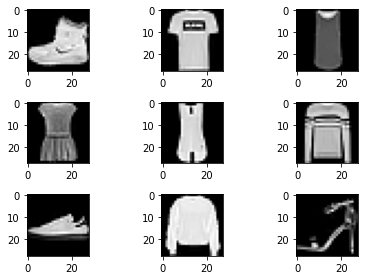

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)    
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))

plt.tight_layout()
plt.savefig('fashion_mnist.jpeg', dpi=300)

In [ ]:
print(train_data.shape, test_data.shape)

train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
print(y.shape, y_test.shape)
print(y[:10])

(60000,) (10000,)
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y, test_size=VAL_SIZE, random_state=RANDOM_STATE)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 31)        310       
                                                                 
 activation (Activation)     (None, 28, 28, 31)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 31)        8680      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 31)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 31)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 62)        17360     
                                                        

In [ ]:
NO_EPOCHS = 10

history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 12s 45ms/step - loss: 0.5596 - accuracy: 0.7943 - val_loss: 0.3871 - val_accuracy: 0.8618
Epoch 2/10
188/188 [==============================] - 6s 34ms/step - loss: 0.3156 - accuracy: 0.8862 - val_loss: 0.2921 - val_accuracy: 0.8935
Epoch 3/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2612 - accuracy: 0.9045 - val_loss: 0.2641 - val_accuracy: 0.9049
Epoch 4/10
188/188 [==============================] - 6s 32ms/step - loss: 0.2266 - accuracy: 0.9180 - val_loss: 0.2489 - val_accuracy: 0.9097
Epoch 5/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2004 - accuracy: 0.9266 - val_loss: 0.2195 - val_accuracy: 0.9200
Epoch 6/10
188/188 [==============================] - 6s 33ms/step - loss: 0.1728 - accuracy: 0.9374 - val_loss: 0.2439 - val_accuracy: 0.9147
Epoch 7/10
188/188 [==============================] - 6s 33ms/step - loss: 0.1523 - accuracy: 0.9451 - val_loss: 0.2269 - val_accuracy: 0.918

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.2716257870197296
Test Accuracy: 0.9169999957084656


**โมเดลที่ 2 #3**

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

In [ ]:
x_batch = datagen.flow(x_train, y_train, batch_size=9).next()
x_batch[0].shape

(9, 28, 28, 1)

In [ ]:
x_batch = x_batch[0].reshape((x_batch[0].shape[0], 28, 28))
x_batch.shape

(9, 28, 28)

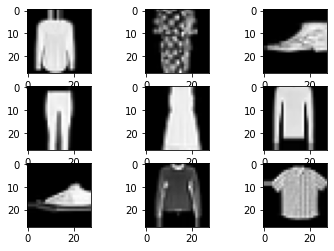

In [ ]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
    
plt.savefig('fashion_mnist2.jpeg', dpi=300)

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 31)        310       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 31)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 31)        8680      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 31)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 31)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 62)        17360     
                                                      

In [ ]:
NO_EPOCHS = 50

history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/50
187/187 [==============================] - 22s 114ms/step - loss: 0.7685 - accuracy: 0.7137 - val_loss: 0.4761 - val_accuracy: 0.8203
Epoch 2/50
187/187 [==============================] - 21s 111ms/step - loss: 0.5143 - accuracy: 0.8075 - val_loss: 0.4257 - val_accuracy: 0.8389
Epoch 3/50
187/187 [==============================] - 22s 118ms/step - loss: 0.4322 - accuracy: 0.8380 - val_loss: 0.3480 - val_accuracy: 0.8676
Epoch 4/50
187/187 [==============================] - 21s 110ms/step - loss: 0.3906 - accuracy: 0.8553 - val_loss: 0.3059 - val_accuracy: 0.8834
Epoch 5/50
187/187 [==============================] - 20s 106ms/step - loss: 0.3565 - accuracy: 0.8649 - val_loss: 0.3105 - val_accuracy: 0.8813
Epoch 6/50
187/187 [==============================] - 20s 106ms/step - loss: 0.3361 - accuracy: 0.8747 - val_loss: 0.2856 - val_accuracy: 0.8919
Epoch 7/50
187/187 [==============================] - 21s 113ms/step - loss: 0.3143 - accuracy: 0.8819 - val_loss: 0.2753 - val_ac

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.2304513156414032
Test Accuracy: 0.9233999848365784


**โมเดลที่ 3 #4 โดยในที่นี้เราจะเอา Batch Normalization มาใช้ร่วมกับเทคนิค Image Augmentation เพื่อแก้ปัญหาการ Overfitting**

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05
)

datagen.fit(x_train)

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 31)        310       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 31)       124       
 ormalization)                                                   
                                                                 
 activation_10 (Activation)  (None, 28, 28, 31)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 31)        8680      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 31)       124       
 hNormalization)                                                 
                                                                 
 activation_11 (Activation)  (None, 28, 28, 31)       

In [ ]:
NO_EPOCHS = 50
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/50
187/187 [==============================] - 26s 127ms/step - loss: 0.5423 - accuracy: 0.7981 - val_loss: 3.0903 - val_accuracy: 0.1639
Epoch 2/50
187/187 [==============================] - 21s 115ms/step - loss: 0.3745 - accuracy: 0.8597 - val_loss: 1.1252 - val_accuracy: 0.6736
Epoch 3/50
187/187 [==============================] - 21s 111ms/step - loss: 0.3372 - accuracy: 0.8738 - val_loss: 0.2823 - val_accuracy: 0.8963
Epoch 4/50
187/187 [==============================] - 21s 111ms/step - loss: 0.3029 - accuracy: 0.8868 - val_loss: 0.3267 - val_accuracy: 0.8813
Epoch 5/50
187/187 [==============================] - 21s 111ms/step - loss: 0.2855 - accuracy: 0.8944 - val_loss: 0.2475 - val_accuracy: 0.9086
Epoch 6/50
187/187 [==============================] - 21s 110ms/step - loss: 0.2731 - accuracy: 0.8981 - val_loss: 0.2709 - val_accuracy: 0.8955
Epoch 7/50
187/187 [==============================] - 21s 114ms/step - loss: 0.2670 - accuracy: 0.9017 - val_loss: 0.2655 - val_ac

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.22464019060134888
Test Accuracy: 0.9300000071525574


**Dropout #5**

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range=0.2,         #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))


#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.30))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 31)        310       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 31)       124       
 hNormalization)                                                 
                                                                 
 activation_15 (Activation)  (None, 28, 28, 31)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 31)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 31)        8680      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 31)       124       
 hNormalization)                                      

In [ ]:
NO_EPOCHS = 200

history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/200
187/187 [==============================] - 27s 127ms/step - loss: 0.8126 - accuracy: 0.6984 - val_loss: 3.1212 - val_accuracy: 0.2233
Epoch 2/200
187/187 [==============================] - 22s 115ms/step - loss: 0.5844 - accuracy: 0.7790 - val_loss: 2.3139 - val_accuracy: 0.3332
Epoch 3/200
187/187 [==============================] - 22s 119ms/step - loss: 0.5097 - accuracy: 0.8083 - val_loss: 0.5112 - val_accuracy: 0.8119
Epoch 4/200
187/187 [==============================] - 21s 113ms/step - loss: 0.4726 - accuracy: 0.8229 - val_loss: 0.3941 - val_accuracy: 0.8521
Epoch 5/200
187/187 [==============================] - 21s 113ms/step - loss: 0.4449 - accuracy: 0.8306 - val_loss: 0.3159 - val_accuracy: 0.8850
Epoch 6/200
187/187 [==============================] - 22s 118ms/step - loss: 0.4210 - accuracy: 0.8421 - val_loss: 0.3380 - val_accuracy: 0.8715
Epoch 7/200
187/187 [==============================] - 22s 120ms/step - loss: 0.4015 - accuracy: 0.8498 - val_loss: 0.2997 -

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.17619766294956207
Test Accuracy: 0.9395999908447266
